Collected data loaded successfully!
Dataset shape: (5, 4)


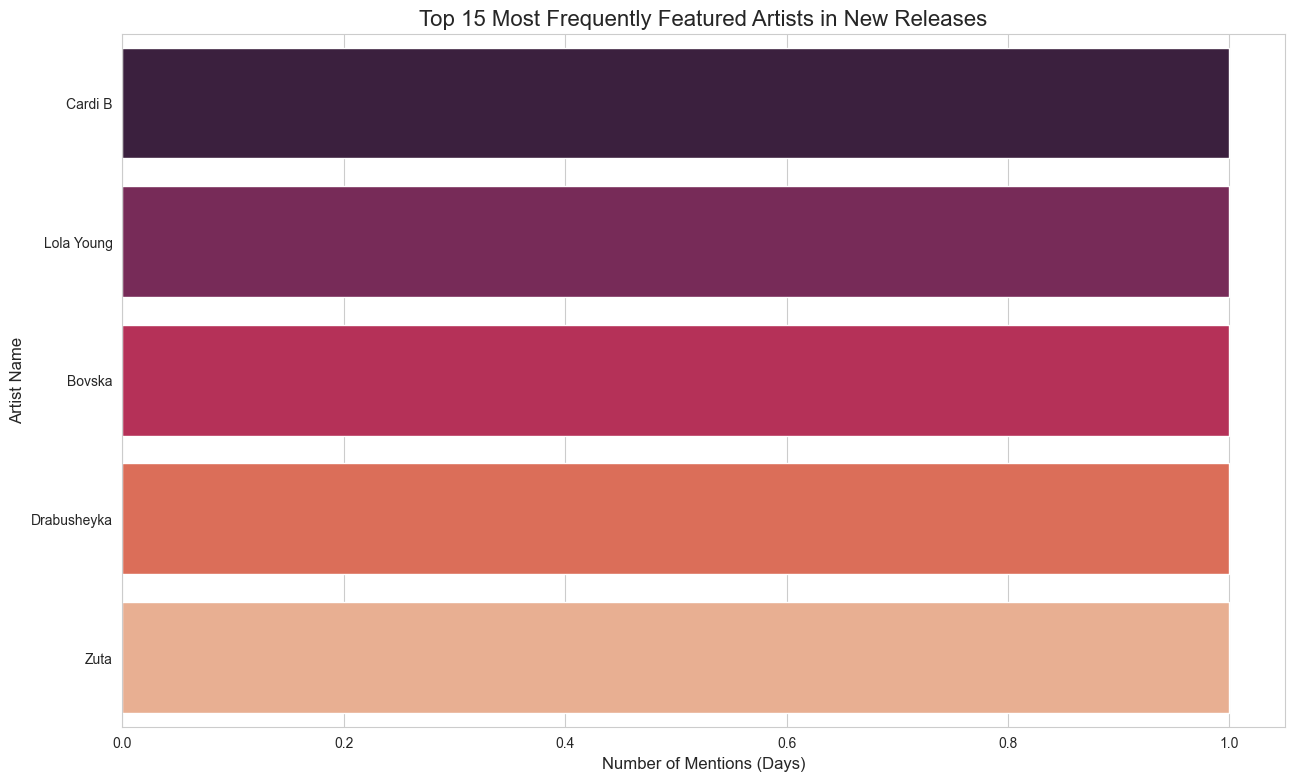

In [7]:
# --- ANALYSIS OF COLLECTED SPOTIFY DATA ---

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configure plot settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# --- Step 1: Load the collected data ---
# This reads the data that our automated pipeline has been collecting.
data_path = 'data/daily_spotify_releases.csv'
try:
    df_analysis = pd.read_csv(data_path)
    print("Collected data loaded successfully!")
    print(f"Dataset shape: {df_analysis.shape}")
except FileNotFoundError:
    print(f"Data file not found at {data_path}. Please run the pipeline script first.")
    df_analysis = pd.DataFrame() # Create an empty df to avoid errors

# --- Step 2: Perform a simple analysis ---
# We will count how many times each artist appeared in the new releases.
if not df_analysis.empty:
    top_artists = df_analysis['artist_name'].value_counts().nlargest(15).reset_index()
    top_artists.columns = ['Artist Name', 'Number of Mentions']

    # --- Step 3: Visualize the results ---
    plt.figure(figsize=(15, 9))
    sns.barplot(x='Number of Mentions', y='Artist Name', data=top_artists, palette='rocket', hue='Artist Name', legend=False)
    
    plt.title('Top 15 Most Frequently Featured Artists in New Releases', fontsize=16)
    plt.xlabel('Number of Mentions (Days)', fontsize=12)
    plt.ylabel('Artist Name', fontsize=12)
    
    # --- Step 4: Save the visualization ---
    # This plot will be used in our README.
    plt.savefig('images/top_artists_chart.png', bbox_inches='tight')
    
    plt.show()
else:
    print("DataFrame is empty. No analysis to perform.")